<a href="https://colab.research.google.com/github/Burgerjoa/colab/blob/main/%ED%8C%A8%EC%85%98_%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9.3 오토인코더의 구현


리스트9.1 훈련용 데이터를 준비한다

(60000, 28, 28) (10000, 28, 28)


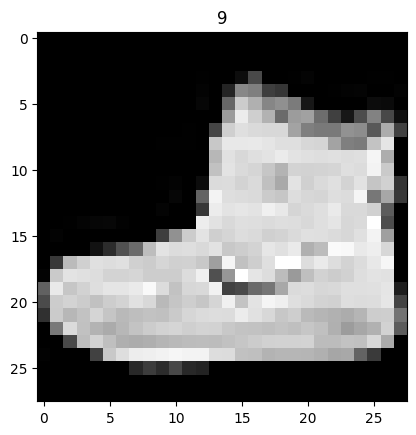

훈련용 데이터의 형태: (60000, 784) 테스트용 데이터의 형태: (10000, 784)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist as data # 케라스 기본 제공 데이터 중 10가지 패션 범주에 대한 이미지 데이터 셋 임포트

(x_train, t_train), (x_test, t_test) = data.load_data()  # 데이터 읽어 들이기
print(x_train.shape, x_test.shape)  # 28x28의 패션 이미지가 6만장

# 각 픽셀의 값을 0-1 범위에 넣는다
x_train = x_train / 255
x_test = x_test / 255

# 패션 이미지를 1개 표시
plt.imshow(x_train[0].reshape(28, 28), cmap="gray")
plt.title(t_train[0])
plt.show() 

# 1차원으로 변환한다
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print("훈련용 데이터의 형태:", x_train.shape, "테스트용 데이터의 형태:", x_test.shape)

리스트9.2 오토인코더의 각 설정

In [8]:
epochs = 20  
batch_size = 128
n_in_out = 784  # 입출력층의 뉴런 수
n_mid = 64  # 중간층의 뉴런 수

리스트9.3 오토인코더 모델의 구축

In [9]:
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense

# 각 층
x = Input(shape=(n_in_out,))  # 입력
encoder = Dense(n_mid, activation="relu")  # Encoder
decoder = Dense(n_in_out, activation="sigmoid")  #D ecoder

# 망
h = encoder(x)
y = decoder(h)

# 오토인코더의 모델
model_autoencoder = Model(x, y)
model_autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
model_autoencoder.summary()
print()

# Encoder만의 모델
model_encoder = Model(x, h)
model_encoder.summary()
print()

# Decoder만의 모델
input_decoder = Input(shape=(n_mid,))
model_decoder = Model(input_decoder, decoder(input_decoder))
model_decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
Total params: 50,240
Trainable para

리스트9.4 오토인코더의 학습

In [10]:
model_autoencoder.fit(x_train, x_train,
                      shuffle=True,
                      epochs=epochs,
                      batch_size=batch_size,
                      validation_data=(x_test, x_test))

Epoch 1/20
469/469 [==============================] - 5s 3ms/step - loss: 0.3571 - val_loss: 0.3094
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2975 - val_loss: 0.2921
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2856 - val_loss: 0.2842
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2801 - val_loss: 0.2806
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2772 - val_loss: 0.2785
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2755 - val_loss: 0.2769
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2743 - val_loss: 0.2760
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2735 - val_loss: 0.2755
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2728 - val_loss: 0.2748
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2723 - val_loss: 0.2744

리스트9.5 오토인코더에 의한 이미지 생성

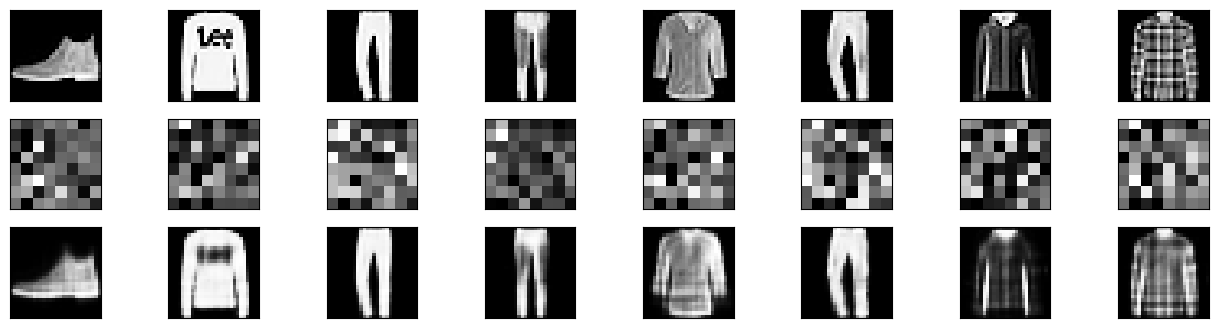

In [11]:
encoded = model_encoder.predict(x_test)
decoded = model_decoder.predict(encoded)

n = 8  # 표시할 이미지 수
plt.figure(figsize=(16, 4))
for i in range(n):
    # 입력 이미지
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="Greys_r")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 중간층의 출력
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(encoded[i].reshape(8,8), cmap="Greys_r") #이미지 크기는 중간층의 뉴런 수에 맞춰서 변경한다
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # 출력 이미지
    ax = plt.subplot(3, n, i+1+2*n)
    plt.imshow(decoded[i].reshape(28, 28), cmap="Greys_r")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()